# Разведочный анализ данных: продолжение

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

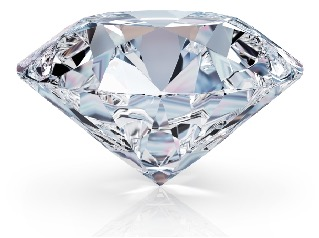

## Импорт библиотек и загрузка данных

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_clean.csv"

In [37]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Исследование данных

Размер датасета

In [39]:
df.shape

(53805, 10)

Информация о типах данных и пропусках

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53805 entries, 0 to 53804
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53805 non-null  float64
 1   cut      53805 non-null  object 
 2   color    53805 non-null  object 
 3   clarity  53805 non-null  object 
 4   depth    53805 non-null  float64
 5   table    53805 non-null  float64
 6   price    53805 non-null  float64
 7   'x'      53805 non-null  float64
 8   'y'      53805 non-null  float64
 9   'z'      53805 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [41]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

median_carat = df['carat'].median()

df['carat'].fillna(median_carat, inplace=True)

median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

median_depth = round(df['y'].median(),2)

df['y'].fillna(median_depth, inplace=True)

df['cut'] = df['cut'].replace('Goood', 'Good')

In [42]:
df_copy = df.copy()

In [43]:
dummies = pd.get_dummies(df_copy["color"], prefix="color", dtype=int)
df_copy = pd.concat([df_copy.drop(columns=["color"]), dummies], axis=1)

In [44]:
df_copy["cut"] = df_copy["cut"].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
df_copy["clarity"] = df_copy["clarity"].replace({'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 2, 'IF': 1})

## Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

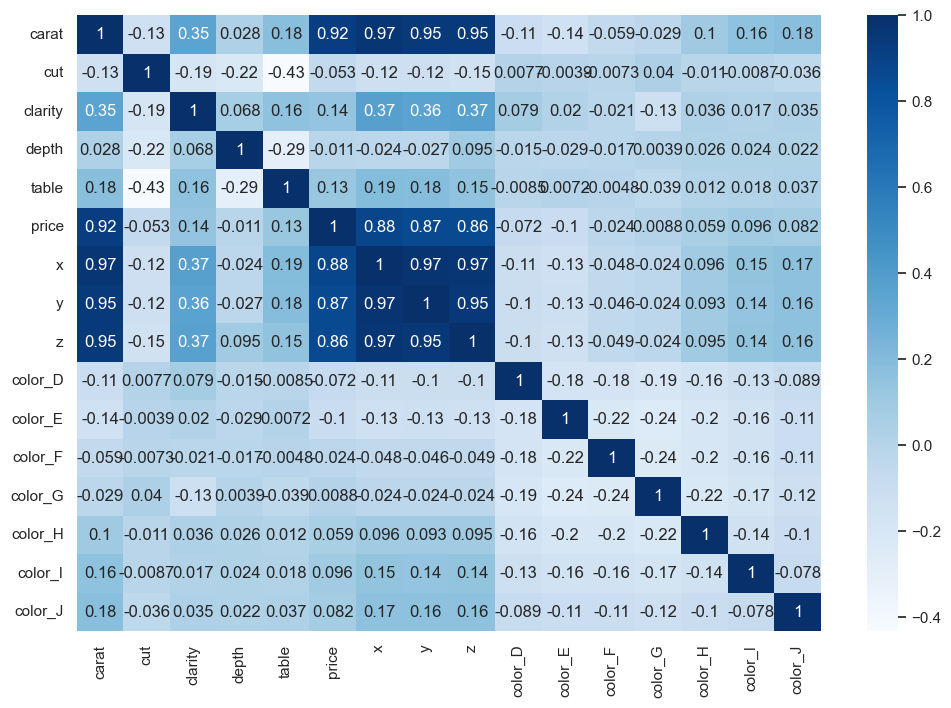

In [18]:
corr = df_copy.corr() # матрица корреляций
sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

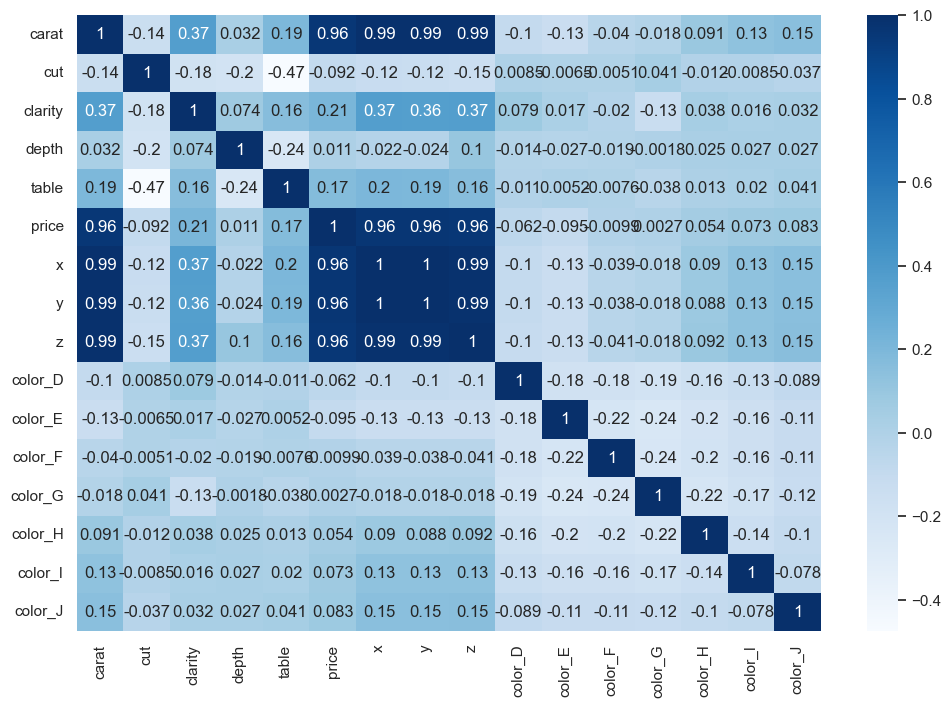

In [19]:

corr = df_copy.corr(method='spearman')
sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

### Задание 1

Вычислите матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

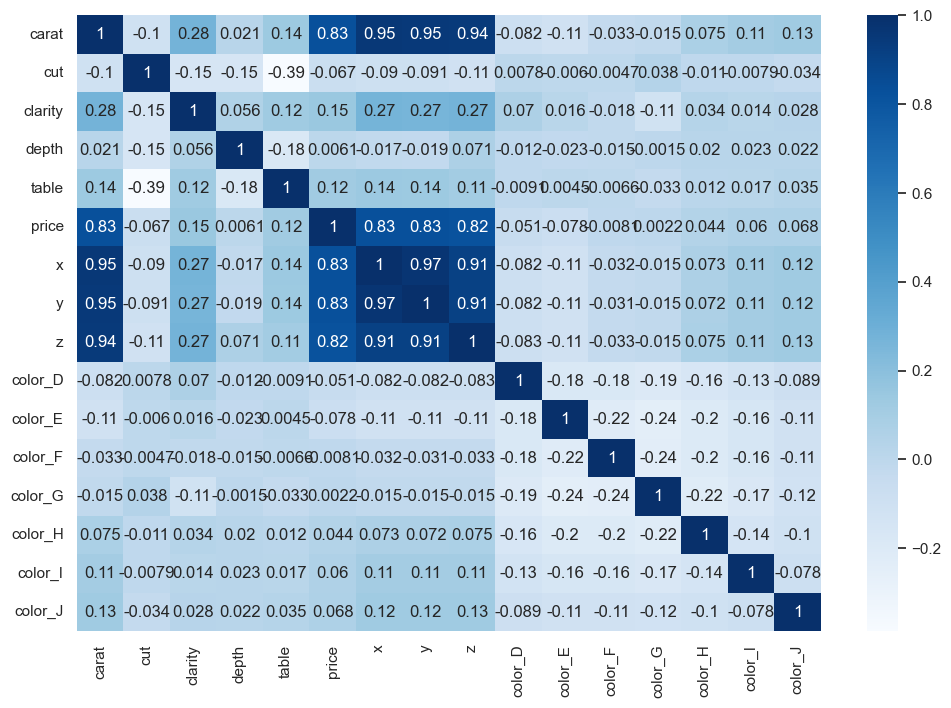

In [20]:

corr = df_copy.corr(method='kendall')
sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

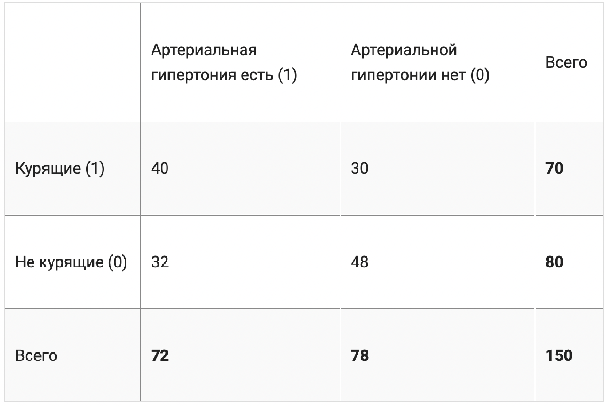

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [21]:
!pip install association-metrics -q


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\k_dys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,cut,color,clarity
cut,1.000000,0.037724,0.142217
color,0.037724,1.000000,0.079487
clarity,0.142217,0.079487,1.000000


### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [47]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.355846642460201e-12
Features are correlated


In [48]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [49]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,cut,carat,Yes
1,cut,depth,Yes
2,cut,table,Yes
3,cut,price,Yes
4,cut,x,Yes
5,cut,y,Yes
6,cut,z,Yes
7,color,carat,Yes
8,color,depth,Yes
9,color,table,Yes


In [52]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
df['bin'] = pd.qcut(df['price'], q=10)
encoded_bins = encoder.fit_transform(df[['bin']])
bins = encoder.categories_[0]
df.drop(columns=['bin'], inplace=True)
df = pd.concat([df, pd.DataFrame(encoded_bins, columns=[f'price_bin_{x}' for x in bins])], axis=1, join='inner')
df

,carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53800,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53801,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53802,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53803,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if (x.dtype == "object") or ('price_bin' in x.name) else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,cut,color,clarity,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
cut,1.000000,0.037724,0.142217,0.096060,0.078045,0.120545,0.051293,0.050616,0.056330,0.111220,0.068169,0.032246,0.069872
color,0.037724,1.000000,0.079487,0.059103,0.082655,0.110426,0.101374,0.043052,0.057744,0.053799,0.092716,0.101189,0.115127
clarity,0.142217,0.079487,1.000000,0.072118,0.137762,0.238472,0.091009,0.062513,0.056185,0.246125,0.183465,0.104963,0.063279
"price_bin_(325.999, 646.0]",0.096060,0.059103,0.072118,1.000000,0.111133,0.111444,0.111271,0.111352,0.111294,0.111363,0.111352,0.111329,0.111340
"price_bin_(646.0, 837.0]",0.078045,0.082655,0.137762,0.111133,1.000000,0.110996,0.110824,0.110904,0.110847,0.110916,0.110904,0.110882,0.110893
"price_bin_(837.0, 1088.0]",0.120545,0.110426,0.238472,0.111444,0.110996,1.000000,0.111134,0.111214,0.111157,0.111226,0.111214,0.111191,0.111203
"price_bin_(1088.0, 1701.0]",0.051293,0.101374,0.091009,0.111271,0.110824,0.111134,1.000000,0.111042,0.110985,0.111054,0.111042,0.111019,0.111031
"price_bin_(1701.0, 2401.0]",0.050616,0.043052,0.062513,0.111352,0.110904,0.111214,0.111042,1.000000,0.111065,0.111134,0.111123,0.111100,0.111111
"price_bin_(2401.0, 3466.4]",0.056330,0.057744,0.056185,0.111294,0.110847,0.111157,0.110985,0.111065,1.000000,0.111077,0.111065,0.111042,0.111054
"price_bin_(3466.4, 4662.0]",0.111220,0.053799,0.246125,0.111363,0.110916,0.111226,0.111054,0.111134,0.111077,1.000000,0.111134,0.111111,0.111123


## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


Хорошая [статья про сравнение Pandas и Polars](https://vc.ru/u/1389654-machine-learning/583603-pandas-vs-polars-sravnenie-sintaksisa-i-skorosti)

In [54]:
df_big = df.copy()

for i in range(50):
  df_big = pd.concat([df_big, df])

df_big.to_csv("diamonds_big.csv", index=False)

In [55]:
df_big.shape, df.shape

((2744055, 20), (53805, 20))

In [56]:
import polars as pl

print(pl.__version__)

1.35.2


### Загрузка данных

In [57]:
%%time

df_pl = pl.read_csv("diamonds_big.csv")

CPU times: total: 1.2 s
Wall time: 235 ms


In [58]:
%%time

df = pd.read_csv("diamonds_big.csv")

CPU times: total: 2 s
Wall time: 2.01 s


### Выбор и фильтрация данных

In [ ]:
df.head()

In [59]:
%%time

df[['carat', 'depth']]

CPU times: total: 15.6 ms
Wall time: 14 ms


,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3
...,...,...
2744050,0.72,60.8
2744051,0.72,63.1
2744052,0.70,62.8
2744053,0.86,61.0


In [60]:
%%time

df_pl[['carat', 'depth']]

# df_pl.select(pl.col(['carat', 'depth']))

CPU times: total: 0 ns
Wall time: 0 ns


carat,depth
f64,f64
0.23,61.5
0.21,59.8
0.23,56.9
0.29,62.4
0.31,63.3
…,…
0.72,60.8
0.72,63.1
0.7,62.8


In [63]:

%%time

df.query('carat > 5')

CPU times: total: 31.2 ms
Wall time: 24 ms


,carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
27355,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81160,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
134965,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188770,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
242575,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296380,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
350185,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
403990,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
457795,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511600,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
%%time

df_pl.filter(pl.col('carat') > 5)

CPU times: total: 0 ns
Wall time: 6 ms


carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Задание 2

С помощью polars и pandas отфильтруйте таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `color` = "J"
* `price` > 1000

Сравните время выполнения запросов

In [68]:
%%time

df[(df.color == 'J') & (df.price > 1000)]

CPU times: total: 78.1 ms
Wall time: 98.6 ms


,carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
172,1.17,Very Good,J,I1,60.2,61.0,2774.0,6.83,6.90,4.13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
247,1.05,Very Good,J,SI2,63.2,56.0,2789.0,6.49,6.45,4.09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
255,1.05,Fair,J,SI2,65.8,59.0,2789.0,6.41,6.27,4.18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
324,1.00,Premium,J,SI2,62.3,58.0,2801.0,6.45,6.34,3.98,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
366,0.93,Premium,J,SI2,61.9,57.0,2807.0,6.21,6.19,3.84,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743817,0.90,Good,J,SI2,63.9,56.0,2717.0,6.17,6.10,3.92,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2743902,0.90,Good,J,SI1,63.2,60.0,2729.0,6.09,6.12,3.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2743963,0.82,Ideal,J,VS2,61.6,56.0,2741.0,6.00,6.04,3.71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2743967,0.83,Ideal,J,VS2,62.3,55.0,2742.0,6.01,6.03,3.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
%%time

df_pl.filter((pl.col('color') == 'J') & (pl.col('price') > 1000))

CPU times: total: 0 ns
Wall time: 8 ms


carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.17,"""Very Good""","""J""","""I1""",60.2,61.0,2774.0,6.83,6.9,4.13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1.05,"""Very Good""","""J""","""SI2""",63.2,56.0,2789.0,6.49,6.45,4.09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1.05,"""Fair""","""J""","""SI2""",65.8,59.0,2789.0,6.41,6.27,4.18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1.0,"""Premium""","""J""","""SI2""",62.3,58.0,2801.0,6.45,6.34,3.98,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.93,"""Premium""","""J""","""SI2""",61.9,57.0,2807.0,6.21,6.19,3.84,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.9,"""Good""","""J""","""SI2""",63.9,56.0,2717.0,6.17,6.1,3.92,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.9,"""Good""","""J""","""SI1""",63.2,60.0,2729.0,6.09,6.12,3.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.82,"""Ideal""","""J""","""VS2""",61.6,56.0,2741.0,6.0,6.04,3.71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Агрегация данных

In [70]:
df_pl.head()

carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
%%time

df.groupby('cut').agg({'table' : 'mean', 'price' : 'max'})

CPU times: total: 93.8 ms
Wall time: 122 ms


,table,price
cut,,
Fair,59.064205,18574.0
Good,58.676450,18788.0
Ideal,55.952779,18806.0
Premium,58.747643,18823.0
Very Good,57.955712,18818.0


In [73]:
%%time

df_pl.group_by('cut').agg([pl.mean('table'), pl.max('price')])

CPU times: total: 78.1 ms
Wall time: 22 ms


cut,table,price
str,f64,f64
"""Fair""",59.064205,18574.0
"""Very Good""",57.955712,18818.0
"""Good""",58.67645,18788.0
"""Premium""",58.747643,18823.0
"""Ideal""",55.952779,18806.0


In [78]:
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='cut')
    .agg(
        [
            pl.col('table').mean(),
            pl.col('price').max()
        ]
    )
)

CPU times: total: 0 ns
Wall time: 425 µs


In [79]:
%%time

q.collect()

CPU times: total: 0 ns
Wall time: 29.9 ms


by,table,price
str,f64,f64
"""Good""",58.67645,18788.0
"""Fair""",59.064205,18574.0
"""Premium""",58.747643,18823.0
"""Ideal""",55.952779,18806.0
"""Very Good""",57.955712,18818.0


### Задание 3

Для каждого цвета (`color`) вычислите медианную стоимость алмазов и средний вес (`carat`).

* Сначала напишите eager-запрос в стиле, приближенном к pandas.

* Затем напишите lazy-запрос в polars-стиле. После этого выполните запрос методом collect.

* Сравните время выполнения запросов.



In [80]:
%%time
result_eager = df_pl.group_by('color').agg([
    pl.median('price').alias('median_price'),
    pl.mean('carat').alias('avg_carat')
]).sort('color')
result_eager

CPU times: total: 625 ms
Wall time: 87 ms


color,median_price,avg_carat
str,f64,f64
"""D""",1842.0,0.658697
"""E""",1741.0,0.657815
"""F""",2345.0,0.736323
"""G""",2246.0,0.770161
"""H""",3453.5,0.909103
"""I""",3723.0,1.020684
"""J""",4234.5,1.15934


In [ ]:
%%time
lazy_query = (
    df_pl
    .lazy()
    .group_by('color')
    .agg([
        pl.median('price').alias('median_price'),
        pl.mean('carat').alias('avg_carat')
    ])
    .sort('color')
)

lazy_query.collect()


CPU times: total: 188 ms
Wall time: 53 ms


color,median_price,avg_carat
str,f64,f64
"""D""",1842.0,0.658697
"""E""",1741.0,0.657815
"""F""",2345.0,0.736323
"""G""",2246.0,0.770161
"""H""",3453.5,0.909103
"""I""",3723.0,1.020684
"""J""",4234.5,1.15934


### Polars lazy-API

[Документация](https://pola-rs.github.io/polars-book/user-guide/lazy/using/)

With the lazy API, Polars doesn't run each query line-by-line but instead processes the full query end-to-end. To get the most out of Polars it is important that you use the lazy API because:

* the lazy API allows Polars to apply automatic query optimization with the query optimizer

* the lazy API allows you to work with larger than memory datasets using streaming

* the lazy API can catch schema errors before processing the data

In [83]:
q = (
    pl.scan_csv("diamonds_big.csv")
    .with_columns(pl.col("color").str.to_lowercase())
    .filter(pl.col("price") > 1000)
)

In [84]:
q

In [85]:
q.show_graph()

ImportError: the graphviz `dot` binary should be on your PATH.(If not installed you can download here: https://graphviz.org/download/)

In [86]:
%%time

q.collect()

CPU times: total: 1.22 s
Wall time: 181 ms


carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
%%time

q.collect(streaming=True)

<timed eval>:1: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.


CPU times: total: 1.8 s
Wall time: 184 ms


carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 646.0]","price_bin_(646.0, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1701.0]","price_bin_(1701.0, 2401.0]","price_bin_(2401.0, 3466.4]","price_bin_(3466.4, 4662.0]","price_bin_(4662.0, 6303.0]","price_bin_(6303.0, 9820.0]","price_bin_(9820.0, 18823.0]"
f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Заключение по Polars и Pandas

Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas, но благодаря его появлению разработчики выпустили Pandas 2.0 - версию классической библиотеки с привычным синтаксисом, но гораздо более быстрой работой.

Про сравнение Pandas, Polars и Pandas 2.0 можно почитать [здесь](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1).

# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

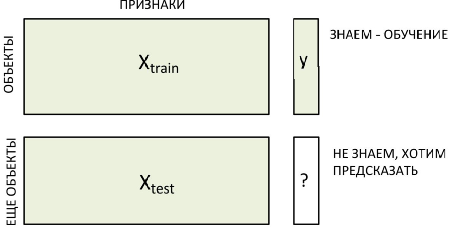

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

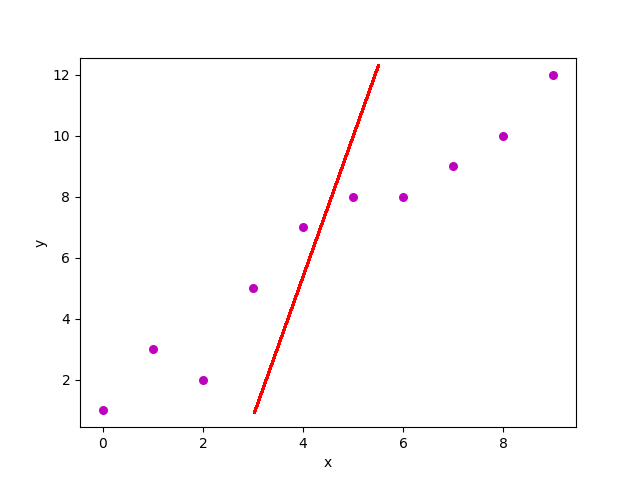

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

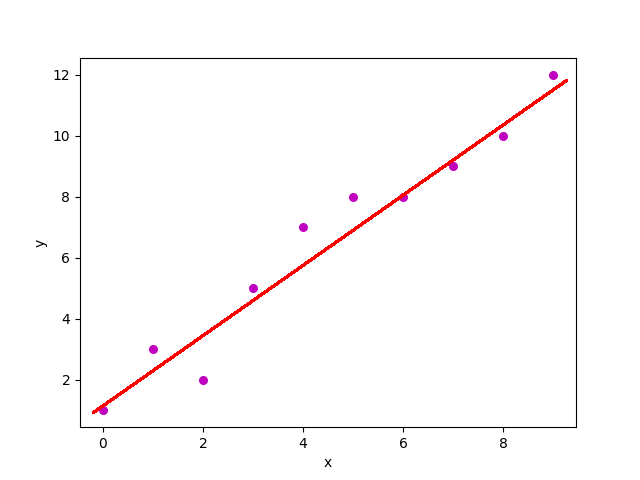

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [88]:
X = df[['carat']] # матрица объект-признак
y = df['price'] # целевая переменная

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

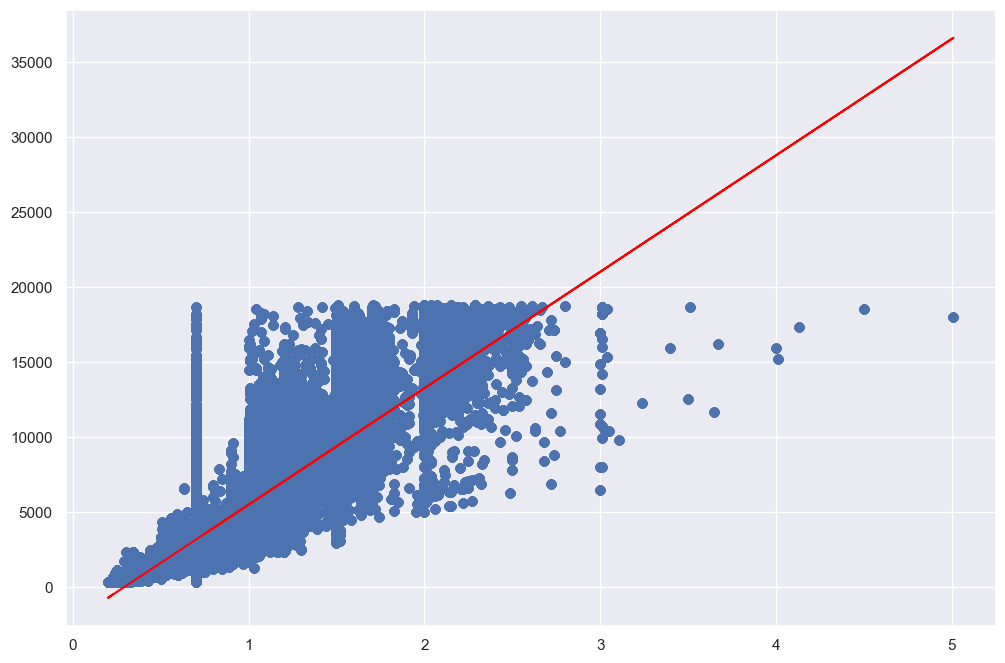

In [90]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [91]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred)

1025.6549394437486

In [93]:
np.mean(y)

3933.562828733389

## Анализ распределения столбцов (целевой переменной)

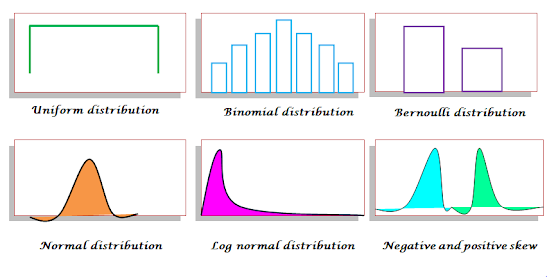

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

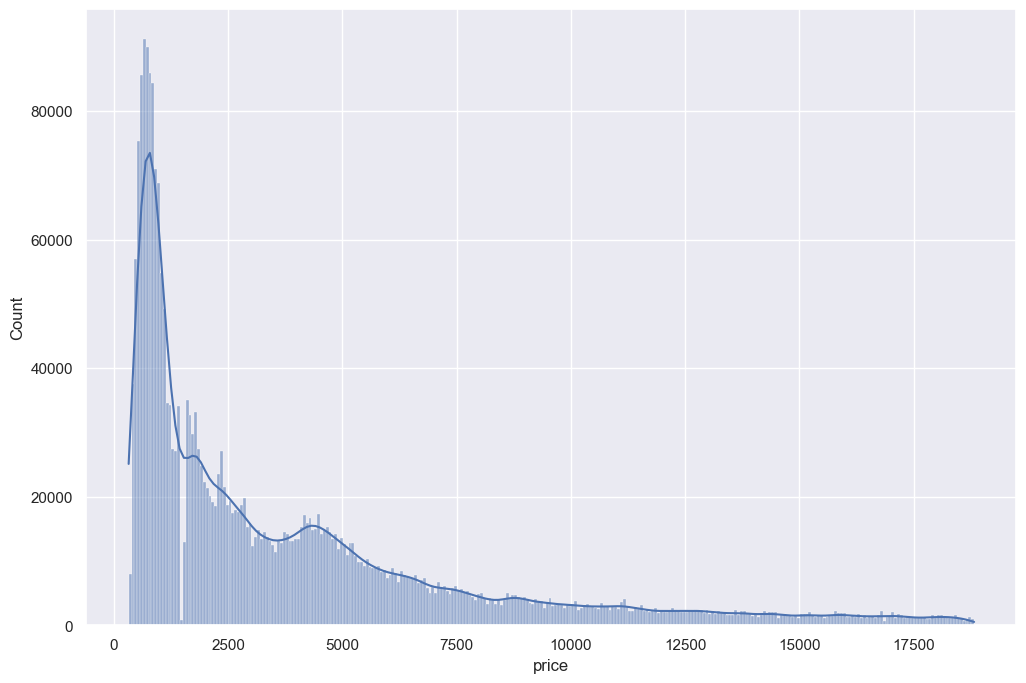

In [94]:
sns.histplot(data = df['price'], kde = True)

<Axes: xlabel='price', ylabel='Count'>

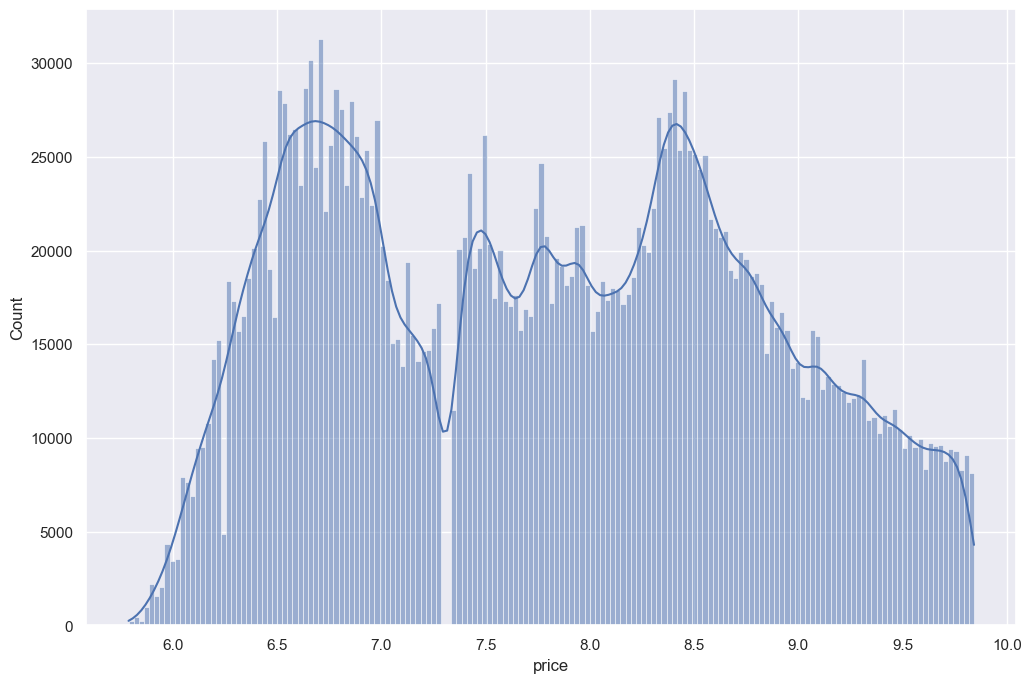

In [95]:
sns.histplot(data = np.log(df['price']), kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [96]:
mean_absolute_error(y[y < 10000], pred[y < 10000])

812.9520456472712

In [97]:
mean_absolute_error(y[y >= 10000], pred[y >= 10000])

3010.432690946703

Действительно, ошибка на дорогих алмазах больше.

In [98]:
X2 = df[['carat']]
y2 = df['depth']

lr = LinearRegression()
lr.fit(X2, y2)

LinearRegression()

In [99]:
pred_depth = lr.predict(X2)

mean_absolute_error(y2, pred_depth), np.mean(y2)

(1.007686980116075, 61.7492798067094)

<Axes: xlabel='depth', ylabel='Count'>

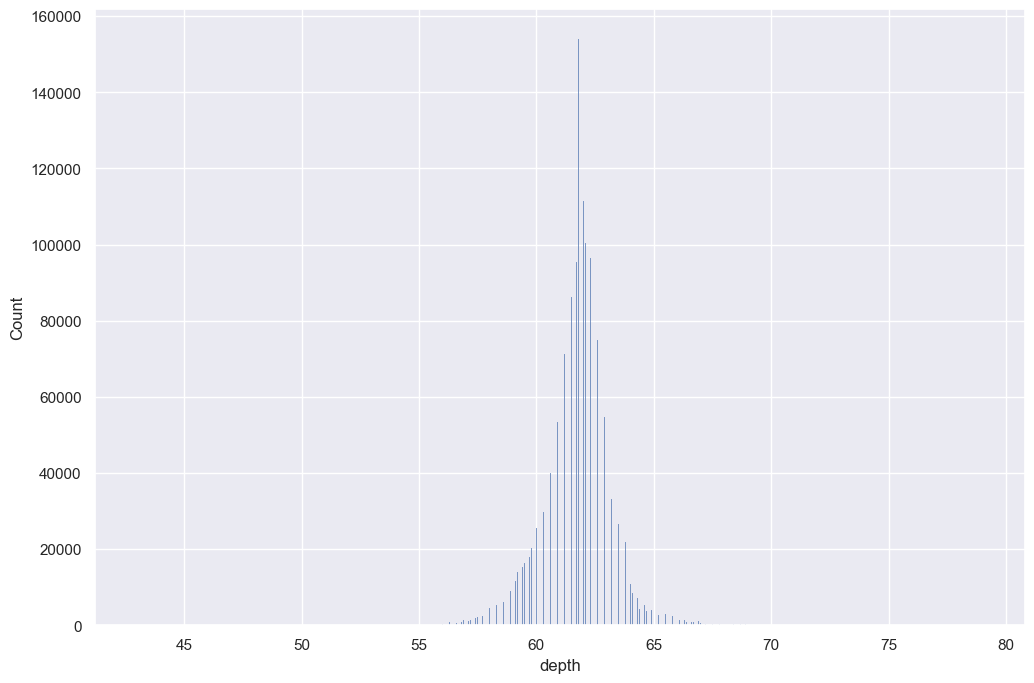

In [100]:
sns.histplot(df.depth)

In [101]:
len(y2[y2<60])/len(y2) # доля выборки

0.09287240962735806

In [102]:
mean_absolute_error(y2[y2<60], pred_depth[y2<60])

2.7813253243166542

In [103]:
len(y2[(y2 >= 60) & (y2 <= 63)])/len(y2) # доля выборки

0.7785335935321996

In [104]:
mean_absolute_error(y2[(y2 >= 60) & (y2 <= 63)], pred_depth[(y2 >= 60) & (y2 <= 63)])

0.601747185799635

## Задание 4

Будем решать задачу прогноза стоимости алмаза по его параметру `table`.

Обучите линейную регрессию для решения этой задачи и выведите на экран ошибку MAE.

In [105]:
X = df[['table']] # матрица объект-признак
y = df['price'] # целевая переменная

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

In [106]:
mean_absolute_error(y, pred)

2989.0193316169684

## Задание 5

Сколько процентов от среднего значения `price` составляет ошибка?

In [107]:
mean_absolute_error(y, pred) / df.price.mean()

0.7598758331208442

## Задание 6

Вычислите ошибку MAE для алмазов маленькой и большой стоимости отдельно:

* `price` < 10_000
* `price` >= 10_000

Какая из ошибок больше?

Как вы думаете почему?

In [110]:
small = df[df['price'] < 10000]
big = df[df['price'] >= 10000]

print(mean_absolute_error(small['price'], lr.predict(small[['table']])))
print(mean_absolute_error(big['price'], lr.predict(big[['table']])))

2279.6265327553724
9608.520454174013


Больше ошибка на больших алмазах. На то 2 причины:
1. Меньше данных -> сложнее строить зависимость
2. Больше сами данные. Т.е. при возможно одинаковой процентной ошибке, абсолютное значение просто больше